## Analysis of Robinhood Portfolio (robin_$tocks)

Project by: Pete Aguirre II

In this project, I will do a retuern:risk analysis on my current Robinhood stock portfolio with the help of multiple 
tools using:
- Python 3
- Jupyter Lab/Notebook
- Beautiful Soup
- Markowitz Efficent Frontier

## TO DO LIST:
- Create a daily, weekly, quarterly, yearly portfolio performance
- Learn how to create beatiful graphs
- Create interactive dashboards 
- Learn Monte Carlo Simulations

In [2]:
# Installing libraries 
# pip install pandas
# pip install numpy
# pip install matplotlib
# pip install robin_stocks

# Libraries Used 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import robin_stocks as r 
import pyotp

from pandas_datareader import data as wb

# Magic
%matplotlib inline

## 1.) Data Collection (updated)
Notes: Log in with Robinhood and portfolio will be gathered automatically

In [ ]:
# Robinhood Log In 
email = input("Enter email: ")
password = input("Enter password: ")

totp = pyotp.TOTP("My2factorAppHere").now()
log_in = r.login(email, password, expiresIn=500, by_sms=True, mfa_code=totp)

# Get stocks value
stonks = r.build_holdings()

# Logout 
r.logout()

In [5]:
# Company tickers
# Since the company tickers are the keys, and the other variables are values, 
# create a dataframe for symbols first.
symbols_df = []
for k in  stonks.keys():
    symbols_df.append(k)
symbols_df = np.array(symbols_df)
symbols_df = pd.DataFrame(symbols_df, columns=['Symbol'])
symbols_df

,Symbol
0,AAPL
1,BRK.B
2,BABA
3,JD
4,XOM
5,LUV
6,DAL
7,PFE
8,AGNC


In [6]:
# Other headers 
# Create a dataframe for the other headers (which are values to the symbol keys).
# Drop some variables: percent_change, equity_change, type, and id 
# Rename the variables to something nicer looking
variables_df = pd.DataFrame.from_dict(stonks.values())
variables_df = variables_df.drop(['percent_change', 'equity_change', 'type', 'id', 'percentage'], axis=1)
variables_df = variables_df.rename(columns={'price':'Price', 'quantity':'Quantity', 'average_buy_price':'Average Price', 'equity':'Equity', 'name':'Name', 'pe_ratio':'P/E'})
variables_df

,Average Price,Equity,Name,P/E,Price,Quantity
0,426.6150,5377.14,Apple,33.780000,448.095000,12.00000000
1,211.3009,2360.93,Berkshire Hathaway,22.944100,214.630000,11.00000000
2,246.0856,2520.80,Alibaba,30.912800,252.080000,10.00000000
3,63.0859,1062.33,JD.com,107.000000,62.490000,17.00000000
4,42.4100,920.10,Exxon Mobil,25.867900,46.005000,20.00000000
5,31.7173,539.92,Southwest Airlines,82.847900,35.995000,15.00000000
6,25.0280,450.68,Delta Air Lines,None,30.045000,15.00000000
7,36.9630,380.75,Pfizer,15.290100,38.075000,10.00000000
8,13.7100,13.80,AGNC Investment,None,13.800000,1.00000000


## 2.) Data Cleaning

In [7]:
# Concatinate both DataFrames 
my_portfolio = pd.concat([symbols_df, variables_df], axis=1)
my_portfolio

,Symbol,Average Price,Equity,Name,P/E,Price,Quantity
0,AAPL,426.6150,5377.14,Apple,33.780000,448.095000,12.00000000
1,BRK.B,211.3009,2360.93,Berkshire Hathaway,22.944100,214.630000,11.00000000
2,BABA,246.0856,2520.80,Alibaba,30.912800,252.080000,10.00000000
3,JD,63.0859,1062.33,JD.com,107.000000,62.490000,17.00000000
4,XOM,42.4100,920.10,Exxon Mobil,25.867900,46.005000,20.00000000
5,LUV,31.7173,539.92,Southwest Airlines,82.847900,35.995000,15.00000000
6,DAL,25.0280,450.68,Delta Air Lines,None,30.045000,15.00000000
7,PFE,36.9630,380.75,Pfizer,15.290100,38.075000,10.00000000
8,AGNC,13.7100,13.80,AGNC Investment,None,13.800000,1.00000000


In [8]:
# Check variable types
my_portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
Symbol           9 non-null object
Average Price    9 non-null object
Equity           9 non-null object
Name             9 non-null object
P/E              7 non-null object
Price            9 non-null object
Quantity         9 non-null object
dtypes: object(7)
memory usage: 584.0+ bytes


In [20]:
# Change some values to floats and round them to 2 decimal numbers
my_portfolio['Price'] = my_portfolio['Price'].astype(float)
my_portfolio['Quantity'] = my_portfolio['Quantity'].astype(float).astype(int)
my_portfolio['Average Price'] = round(my_portfolio['Average Price'].astype(float), 2)
my_portfolio['Equity'] = round(my_portfolio['Equity'].astype(float), 2)
my_portfolio['P/E'] = my_portfolio['P/E'].astype(float)
my_portfolio

,Symbol,Average Price,Equity,Name,P/E,Price,Quantity
0,AAPL,426.62,5377.14,Apple,33.7800,448.095,12
1,BRK.B,211.30,2360.93,Berkshire Hathaway,22.9441,214.630,11
2,BABA,246.09,2520.80,Alibaba,30.9128,252.080,10
3,JD,63.09,1062.33,JD.com,107.0000,62.490,17
4,XOM,42.41,920.10,Exxon Mobil,25.8679,46.005,20
5,LUV,31.72,539.92,Southwest Airlines,82.8479,35.995,15
6,DAL,25.03,450.68,Delta Air Lines,NaN,30.045,15
7,PFE,36.96,380.75,Pfizer,15.2901,38.075,10
8,AGNC,13.71,13.80,AGNC Investment,NaN,13.800,1


In [21]:
# Check once more
# Note: at this point, numbers should be floats
my_portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
Symbol           9 non-null object
Average Price    9 non-null float64
Equity           9 non-null float64
Name             9 non-null object
P/E              7 non-null float64
Price            9 non-null float64
Quantity         9 non-null int32
dtypes: float64(4), int32(1), object(2)
memory usage: 548.0+ bytes


In [22]:
my_portfolio = my_portfolio[["Name","Symbol","Price","Quantity","Average Price","Equity","P/E"]]
# my_portfolio

In [23]:
# Convert any '.' to '-' in symbols
my_portfolio['Symbol'] = my_portfolio['Symbol'].str.replace(".", "-")

In [24]:
# Confirm that '.' has been replaced by '-' on symbol
my_portfolio

,Name,Symbol,Price,Quantity,Average Price,Equity,P/E
0,Apple,AAPL,448.095,12,426.62,5377.14,33.7800
1,Berkshire Hathaway,BRK-B,214.630,11,211.30,2360.93,22.9441
2,Alibaba,BABA,252.080,10,246.09,2520.80,30.9128
3,JD.com,JD,62.490,17,63.09,1062.33,107.0000
4,Exxon Mobil,XOM,46.005,20,42.41,920.10,25.8679
5,Southwest Airlines,LUV,35.995,15,31.72,539.92,82.8479
6,Delta Air Lines,DAL,30.045,15,25.03,450.68,NaN
7,Pfizer,PFE,38.075,10,36.96,380.75,15.2901
8,AGNC Investment,AGNC,13.800,1,13.71,13.80,NaN


In [25]:
# Create weights for each company
# capital = sigma(quantity * average price)
# weights = (quantity * average price)/capital

capital = np.sum(my_portfolio['Quantity']*my_portfolio['Average Price'])
weights = []

for w in range(len(my_portfolio)):
    weights.append(round(((my_portfolio['Quantity'][w] * my_portfolio['Average Price'][w])/capital), 2))

weights_df = np.array(weights)
weights_df = pd.DataFrame({'Weights':weights})



In [26]:
# Ensure that these are the only variables included
my_portfolio = pd.concat([my_portfolio, weights_df], axis=1)
my_portfolio

,Name,Symbol,Price,Quantity,Average Price,Equity,P/E,Weights
0,Apple,AAPL,448.095,12,426.62,5377.14,33.7800,0.39
1,Berkshire Hathaway,BRK-B,214.630,11,211.30,2360.93,22.9441,0.18
2,Alibaba,BABA,252.080,10,246.09,2520.80,30.9128,0.19
3,JD.com,JD,62.490,17,63.09,1062.33,107.0000,0.08
4,Exxon Mobil,XOM,46.005,20,42.41,920.10,25.8679,0.06
5,Southwest Airlines,LUV,35.995,15,31.72,539.92,82.8479,0.04
6,Delta Air Lines,DAL,30.045,15,25.03,450.68,NaN,0.03
7,Pfizer,PFE,38.075,10,36.96,380.75,15.2901,0.03
8,AGNC Investment,AGNC,13.800,1,13.71,13.80,NaN,0.00


## 3.) Data Collection of Historical Prices

In [53]:
# Collect historical prices by Yahoo! Finance est. 2000 
tickers = my_portfolio['Symbol']
start_date = '2000-01-01'
historical_data = pd.DataFrame()
for t in tickers:
    historical_data[t] = wb.DataReader(t, data_source='yahoo', start=start_date)['Adj Close']

In [54]:
# Remove all rows that includes NaN values
# Check if all columns match and are float variables
historical_data = historical_data.dropna()
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1484 entries, 2014-09-19 to 2020-08-11
Data columns (total 9 columns):
AAPL     1484 non-null float64
BRK-B    1484 non-null float64
BABA     1484 non-null float64
JD       1484 non-null float64
XOM      1484 non-null float64
LUV      1484 non-null float64
DAL      1484 non-null float64
PFE      1484 non-null float64
AGNC     1484 non-null float64
dtypes: float64(9)
memory usage: 115.9 KB


In [55]:
historical_data.head()

,AAPL,BRK-B,BABA,JD,XOM,LUV,DAL,PFE,AGNC
Date,,,,,,,,,
2014-09-19,91.730469,140.559998,93.889999,28.350000,76.869209,32.756878,34.706215,24.432196,11.025264
2014-09-22,91.821304,139.259995,89.889999,26.969999,76.410164,32.368275,34.086460,24.255381,10.922181
2014-09-23,93.256874,138.779999,87.169998,26.570000,76.006470,31.524702,33.861919,24.150904,10.882905
2014-09-24,92.448242,139.949997,90.570000,27.180000,75.840286,32.538883,33.825985,24.359863,10.843635
2014-09-25,88.922958,137.089996,88.919998,26.570000,74.597649,31.884882,32.927792,24.094643,10.848540


In [56]:
historical_data.tail()

,AAPL,BRK-B,BABA,JD,XOM,LUV,DAL,PFE,AGNC
Date,,,,,,,,,
2020-08-05,439.457642,203.619995,264.910004,65.519997,43.849998,32.720001,26.469999,38.450001,13.74
2020-08-06,454.790009,205.020004,265.679993,64.910004,43.639999,33.020000,27.080000,38.270000,13.62
2020-08-07,444.450012,209.479996,252.100006,62.060001,43.439999,33.279999,27.180000,38.450001,13.63
2020-08-10,450.910004,212.580002,248.130005,61.490002,44.509998,34.990002,29.340000,38.389999,13.89
2020-08-11,448.174988,214.897903,252.179993,62.430000,45.919998,36.025002,30.020000,38.078499,13.84


In [57]:
# Calculate log returns of each companies 
# Check if all columns match and are float variables
returns = np.log(historical_data/historical_data.shift(1))
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1484 entries, 2014-09-19 to 2020-08-11
Data columns (total 9 columns):
AAPL     1483 non-null float64
BRK-B    1483 non-null float64
BABA     1483 non-null float64
JD       1483 non-null float64
XOM      1483 non-null float64
LUV      1483 non-null float64
DAL      1483 non-null float64
PFE      1483 non-null float64
AGNC     1483 non-null float64
dtypes: float64(9)
memory usage: 115.9 KB


In [58]:
returns.head()

,AAPL,BRK-B,BABA,JD,XOM,LUV,DAL,PFE,AGNC
Date,,,,,,,,,
2014-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-22,0.000990,-0.009292,-0.043537,-0.049902,-0.005990,-0.011934,-0.018019,-0.007263,-0.009394
2014-09-23,0.015513,-0.003453,-0.030726,-0.014942,-0.005297,-0.026407,-0.006609,-0.004317,-0.003602
2014-09-24,-0.008709,0.008395,0.038263,0.022699,-0.002189,0.031664,-0.001062,0.008615,-0.003615
2014-09-25,-0.038879,-0.020648,-0.018386,-0.022699,-0.016521,-0.020304,-0.026912,-0.010947,0.000452


In [59]:
returns.tail()

,AAPL,BRK-B,BABA,JD,XOM,LUV,DAL,PFE,AGNC
Date,,,,,,,,,
2020-08-05,0.003618,0.016739,0.010283,0.014605,0.008704,0.041179,0.030689,0.001562,0.013187
2020-08-06,0.034294,0.006852,0.002902,-0.009354,-0.004801,0.009127,0.022783,-0.004692,-0.008772
2020-08-07,-0.022998,0.021521,-0.052467,-0.044900,-0.004594,0.007843,0.003686,0.004692,0.000734
2020-08-10,0.014430,0.014690,-0.015873,-0.009227,0.024333,0.050106,0.076470,-0.001562,0.018896
2020-08-11,-0.006084,0.010845,0.016190,0.015171,0.031187,0.029151,0.022912,-0.008147,-0.003606


## 4.) Data Analysis

In [60]:
# Create a table for Daily and Annual Risk Returns 
# Daily mean formula: daily_mean = returns.mean()
# Daily stdv formula: daily_mean = returns.std()
# Annual mean formula: annual_mean = returns.mean()*250
# Annual stdv formula: annual_mean = returns.std()*250 ** .5

daily_mean = []
daily_stdv = []

annual_mean = []
annual_stdv = []

for t in tickers:
    daily_mean.append(round(returns[t].mean()*100, 2))
    daily_stdv.append(round(returns[t].std()*100, 2))
    
    annual_mean.append(round((returns[t].mean()*250)*100, 2))
    annual_stdv.append(round((returns[t].std()*250**.5)*100, 2))

daily_mean = np.array(daily_mean)
daily_stdv = np.array(daily_stdv)
annual_mean = np.array(annual_mean)
annual_stdv = np.array(annual_stdv)
annual_stdv

array([28.43, 20.61, 32.62, 41.31, 26.14, 35.68, 40.81, 21.19, 24.03])

In [61]:
# Create DataFrame for returns and risk 
returns_data = pd.DataFrame({'Symbol':tickers, 
                             'Daily Average Return (%)':daily_mean,
                             'Daily Risk (%)':daily_stdv,
                             'Annual Average Return (%)':annual_mean,
                             'Annual Risk (%)':annual_stdv
                            })
returns_data

,Symbol,Daily Average Return (%),Daily Risk (%),Annual Average Return (%),Annual Risk (%)
0,AAPL,0.11,1.80,26.74,28.43
1,BRK-B,0.03,1.30,7.16,20.61
2,BABA,0.07,2.06,16.66,32.62
3,JD,0.05,2.61,13.31,41.31
4,XOM,-0.03,1.65,-8.69,26.14
5,LUV,0.01,2.26,1.60,35.68
6,DAL,-0.01,2.58,-2.45,40.81
7,PFE,0.03,1.34,7.48,21.19
8,AGNC,0.02,1.52,3.83,24.03


In [62]:
# Returns the lowest return in history between 09-30-2014 to now
returns.idxmin() 

AAPL    2020-03-16
BRK-B   2020-03-12
BABA    2015-01-29
JD      2020-03-16
XOM     2020-03-09
LUV     2020-03-12
DAL     2020-03-18
PFE     2020-03-16
AGNC    2020-03-12
dtype: datetime64[ns]

In [63]:
# Returns the highest return in history between 09-30-2014 to now
returns.idxmax()

AAPL    2020-03-13
BRK-B   2020-03-13
BABA    2017-06-08
JD      2019-08-13
XOM     2020-03-24
LUV     2020-03-13
DAL     2020-03-24
PFE     2020-03-13
AGNC    2020-03-25
dtype: datetime64[ns]

In [64]:
# Covariance daily
# Determines if there is a relationship between two stocks, whether they move together:
# positively, negatively, or neutral 
return_cov = returns.cov()
return_cov

,AAPL,BRK-B,BABA,JD,XOM,LUV,DAL,PFE,AGNC
AAPL,0.000323,0.000137,0.000173,0.000212,0.000137,0.000153,0.000179,0.000101,0.000079
BRK-B,0.000137,0.000170,0.000102,0.000123,0.000145,0.000157,0.000190,0.000098,0.000080
BABA,0.000173,0.000102,0.000426,0.000338,0.000106,0.000135,0.000163,0.000075,0.000052
JD,0.000212,0.000123,0.000338,0.000683,0.000129,0.000163,0.000172,0.000089,0.000062
XOM,0.000137,0.000145,0.000106,0.000129,0.000273,0.000149,0.000188,0.000093,0.000110
LUV,0.000153,0.000157,0.000135,0.000163,0.000149,0.000509,0.000450,0.000101,0.000135
DAL,0.000179,0.000190,0.000163,0.000172,0.000188,0.000450,0.000666,0.000114,0.000191
PFE,0.000101,0.000098,0.000075,0.000089,0.000093,0.000101,0.000114,0.000180,0.000053
AGNC,0.000079,0.000080,0.000052,0.000062,0.000110,0.000135,0.000191,0.000053,0.000231


In [65]:
# Covariance yearly
# Determines if there is a relationship between two stocks, whether they move together:
# positively, negatively, or neutral 
return_cov = returns.cov()*250
return_cov

,AAPL,BRK-B,BABA,JD,XOM,LUV,DAL,PFE,AGNC
AAPL,0.080802,0.034212,0.043229,0.052973,0.034286,0.038201,0.044871,0.025174,0.019713
BRK-B,0.034212,0.042457,0.025610,0.030732,0.036229,0.039290,0.047551,0.024535,0.019968
BABA,0.043229,0.025610,0.106378,0.084425,0.026458,0.033858,0.040727,0.018803,0.012971
JD,0.052973,0.030732,0.084425,0.170651,0.032295,0.040809,0.043109,0.022283,0.015440
XOM,0.034286,0.036229,0.026458,0.032295,0.068338,0.037298,0.047046,0.023240,0.027453
LUV,0.038201,0.039290,0.033858,0.040809,0.037298,0.127277,0.112467,0.025314,0.033826
DAL,0.044871,0.047551,0.040727,0.043109,0.047046,0.112467,0.166582,0.028557,0.047791
PFE,0.025174,0.024535,0.018803,0.022283,0.023240,0.025314,0.028557,0.044900,0.013151
AGNC,0.019713,0.019968,0.012971,0.015440,0.027453,0.033826,0.047791,0.013151,0.057732


In [66]:
# Correlations
# Determines how close the relationship are between two stocks
return_corr = returns.corr()
return_corr

,AAPL,BRK-B,BABA,JD,XOM,LUV,DAL,PFE,AGNC
AAPL,1.000000,0.584106,0.466266,0.451114,0.461391,0.376691,0.386757,0.417937,0.288625
BRK-B,0.584106,1.000000,0.381074,0.361049,0.672601,0.534477,0.565426,0.561939,0.403318
BABA,0.466266,0.381074,1.000000,0.626600,0.310311,0.290978,0.305941,0.272074,0.165514
JD,0.451114,0.361049,0.626600,1.000000,0.299054,0.276905,0.255680,0.254565,0.155556
XOM,0.461391,0.672601,0.310311,0.299054,1.000000,0.399923,0.440936,0.419553,0.437068
LUV,0.376691,0.534477,0.290978,0.276905,0.399923,1.000000,0.772389,0.334857,0.394609
DAL,0.386757,0.565426,0.305941,0.255680,0.440936,0.772389,1.000000,0.330202,0.487329
PFE,0.417937,0.561939,0.272074,0.254565,0.419553,0.334857,0.330202,1.000000,0.258304
AGNC,0.288625,0.403318,0.165514,0.155556,0.437068,0.394609,0.487329,0.258304,1.000000


In [67]:
# Calculating Diversifiable and Non-Diversifiable

# Portfolio variance
pflio_var = np.dot(my_portfolio['Weights'].T, np.dot(returns.cov()*250, my_portfolio['Weights']))
print("Portfolio Variance", pflio_var)

# Portfolio volatility 
#pflio_vol = (np.dot(my_portfolio['Weight'].T, np.dot(sec_returns.cov()*250, my_portfolio['Weight'])))**.5
#print("Portfolio Volatility:", pflio_vol)

# or...

pflio_vol2 = np.sqrt(pflio_var)
print("Portfolio Volatility:", pflio_vol2)


# Calculating variance annually for each tickers
var_a = []
for t in tickers:
    var_a.append(returns[t].var()*250)

var_a = np.array(var_a)
variances = pd.DataFrame({'Symbol':tickers, 'Variance':var_a})
print("")
# Diversifiable Risk
# div_risk = pflio_var - my_portfolio['Weight'][0]**2*variances['Variance'][0] - ...
#                  ... - my_portfolio['Weight'][n]**2*variances['Variance'][n]
div_risk = 0   
for i in range(len(my_portfolio)):
    if i==0:
        div_risk = pflio_var - my_portfolio['Weights'][0]**2*variances['Variance'][0]
    else:
        div_risk -= my_portfolio['Weights'][i]**2*variances['Variance'][i]
print("Diversifiable Risk:", div_risk)

print("")
# Non Diversifiable Risk
non_div_risk1 = pflio_var - div_risk
non_div_risk1 = round(non_div_risk1, 4)
print("Non-Diversifiable Risk:", non_div_risk1)

print("")
non_div_risk2 = 0
for i in range(len(my_portfolio)):
    non_div_risk2 += my_portfolio['Weights'][i]**2*variances['Variance'][i]

    
print("")
non_div_risk2 = round(non_div_risk2, 4)
print("Non-Diversifiable Risk:", non_div_risk2)
print("Non-Diversifiable Risk:", non_div_risk2 == non_div_risk1)

Portfolio Variance 0.04901481885190306
Portfolio Volatility: 0.22139290605595982

Diversifiable Risk: 0.02977676111883522

Non-Diversifiable Risk: 0.0192


Non-Diversifiable Risk: 0.0192
Non-Diversifiable Risk: True


In [68]:
no_assets = len(tickers)
no_assets

9

In [69]:
pflio_ret = []
pflio_vol = [] 
pflio_wei = []

for x in range(10000):
    weights = np.random.random(no_assets)
    weights /= np.sum(weights)
    
    pflio_wei.append(weights)
    pflio_ret.append(np.sum(weights*returns.mean())*250)
    pflio_vol.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov()*250, weights))))
    #print(x, weights)

pflio_wei = np.array(pflio_wei)
pflio_ret = np.array(pflio_ret)
pflio_vol = np.array(pflio_vol)

print(np.sum(weights))
#pflio_returns, pflio_volatilities

0.9999999999999998


In [70]:
pflio_scenarios = pd.DataFrame({'Return': pflio_ret, 'Volatility': pflio_vol})
pflio_scenarios = pflio_scenarios.sort_values('Return', ascending=True)

In [71]:
pflio_scenarios.head()
#pflio_scenarios['Return']

,Return,Volatility
4640,-0.009746,0.227534
119,0.003909,0.241908
6418,0.007363,0.217122
5780,0.008361,0.238841
4104,0.011767,0.237756


In [72]:
pflio_scenarios.tail(10)

,Return,Volatility
6000,0.138045,0.217407
847,0.138963,0.237033
6772,0.141481,0.233915
5961,0.141556,0.224488
5048,0.144817,0.226953
2105,0.145202,0.245443
145,0.145331,0.212388
1165,0.156557,0.216833
4408,0.158733,0.222036
8991,0.158895,0.207935


Text(0, 0.5, 'Expected Return')

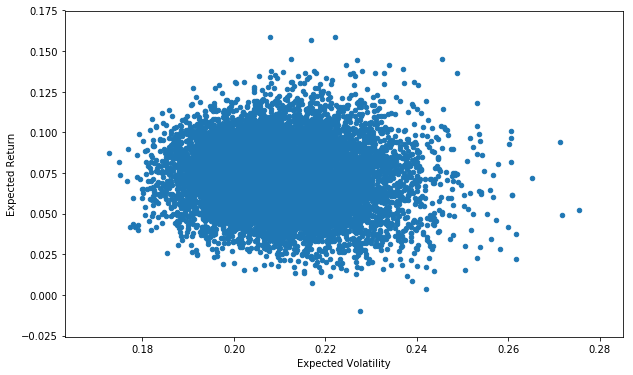

In [73]:
# Efficient Frontier 
pflio_scenarios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [74]:
# For Testing purposes
index = 8891
#index = len(pflio_scenarios)-1
pfolio_wei2 = []
tickers2 = []
tickers2 = np.array(tickers)
print(index)
print(np.sum(pflio_wei[index]))
pflio_wei2 = pflio_wei[index]



ideal_portfolio = pd.DataFrame({'Weights': pflio_wei2})
ideal_portfolio = pd.concat([symbols_df, ideal_portfolio], axis=1)
ideal_portfolio = ideal_portfolio.sort_values('Weights', ascending=False)
ideal_portfolio.to_csv('ideal_weights.csv', index=False)
ideal_portfolio

8891
1.0000000000000002


,Symbol,Weights
5,LUV,0.209039
7,PFE,0.203428
3,JD,0.139198
1,BRK.B,0.129765
4,XOM,0.128732
2,BABA,0.097557
6,DAL,0.044966
8,AGNC,0.040239
0,AAPL,0.007075


## Data Visualization

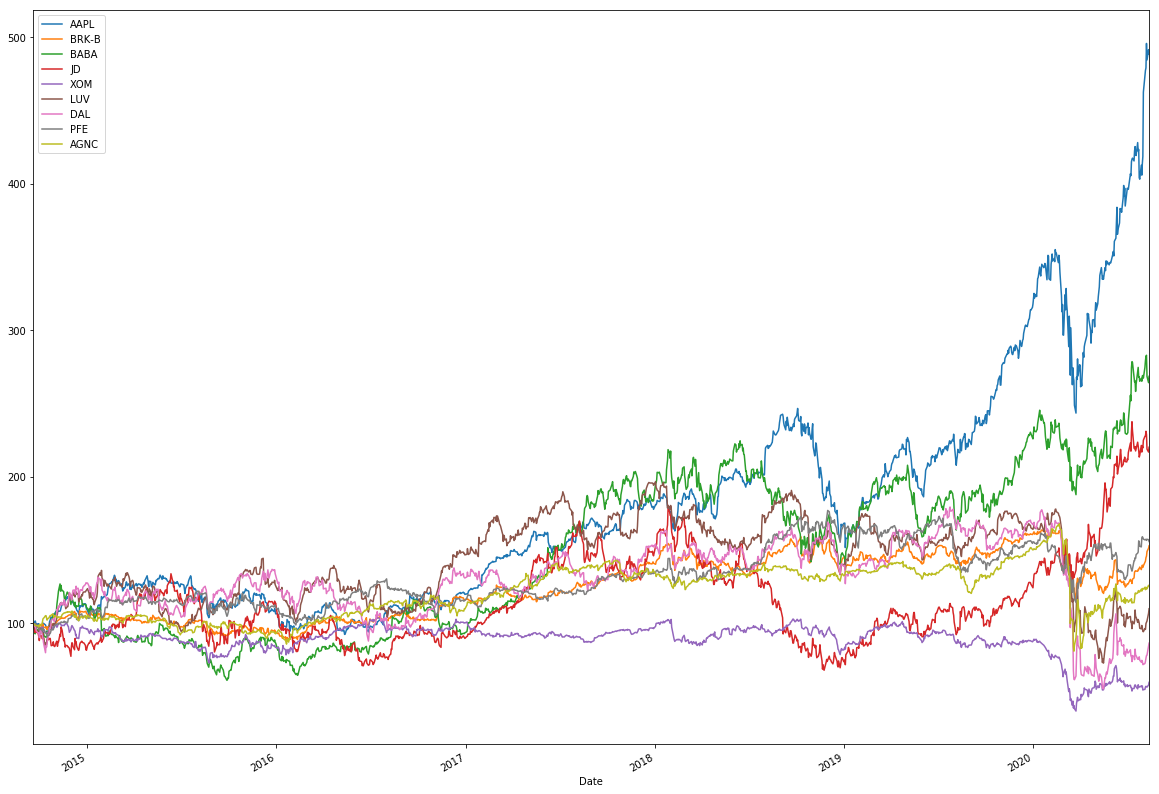

In [75]:
(historical_data/historical_data.iloc[0]*100).plot(figsize=(20,15))

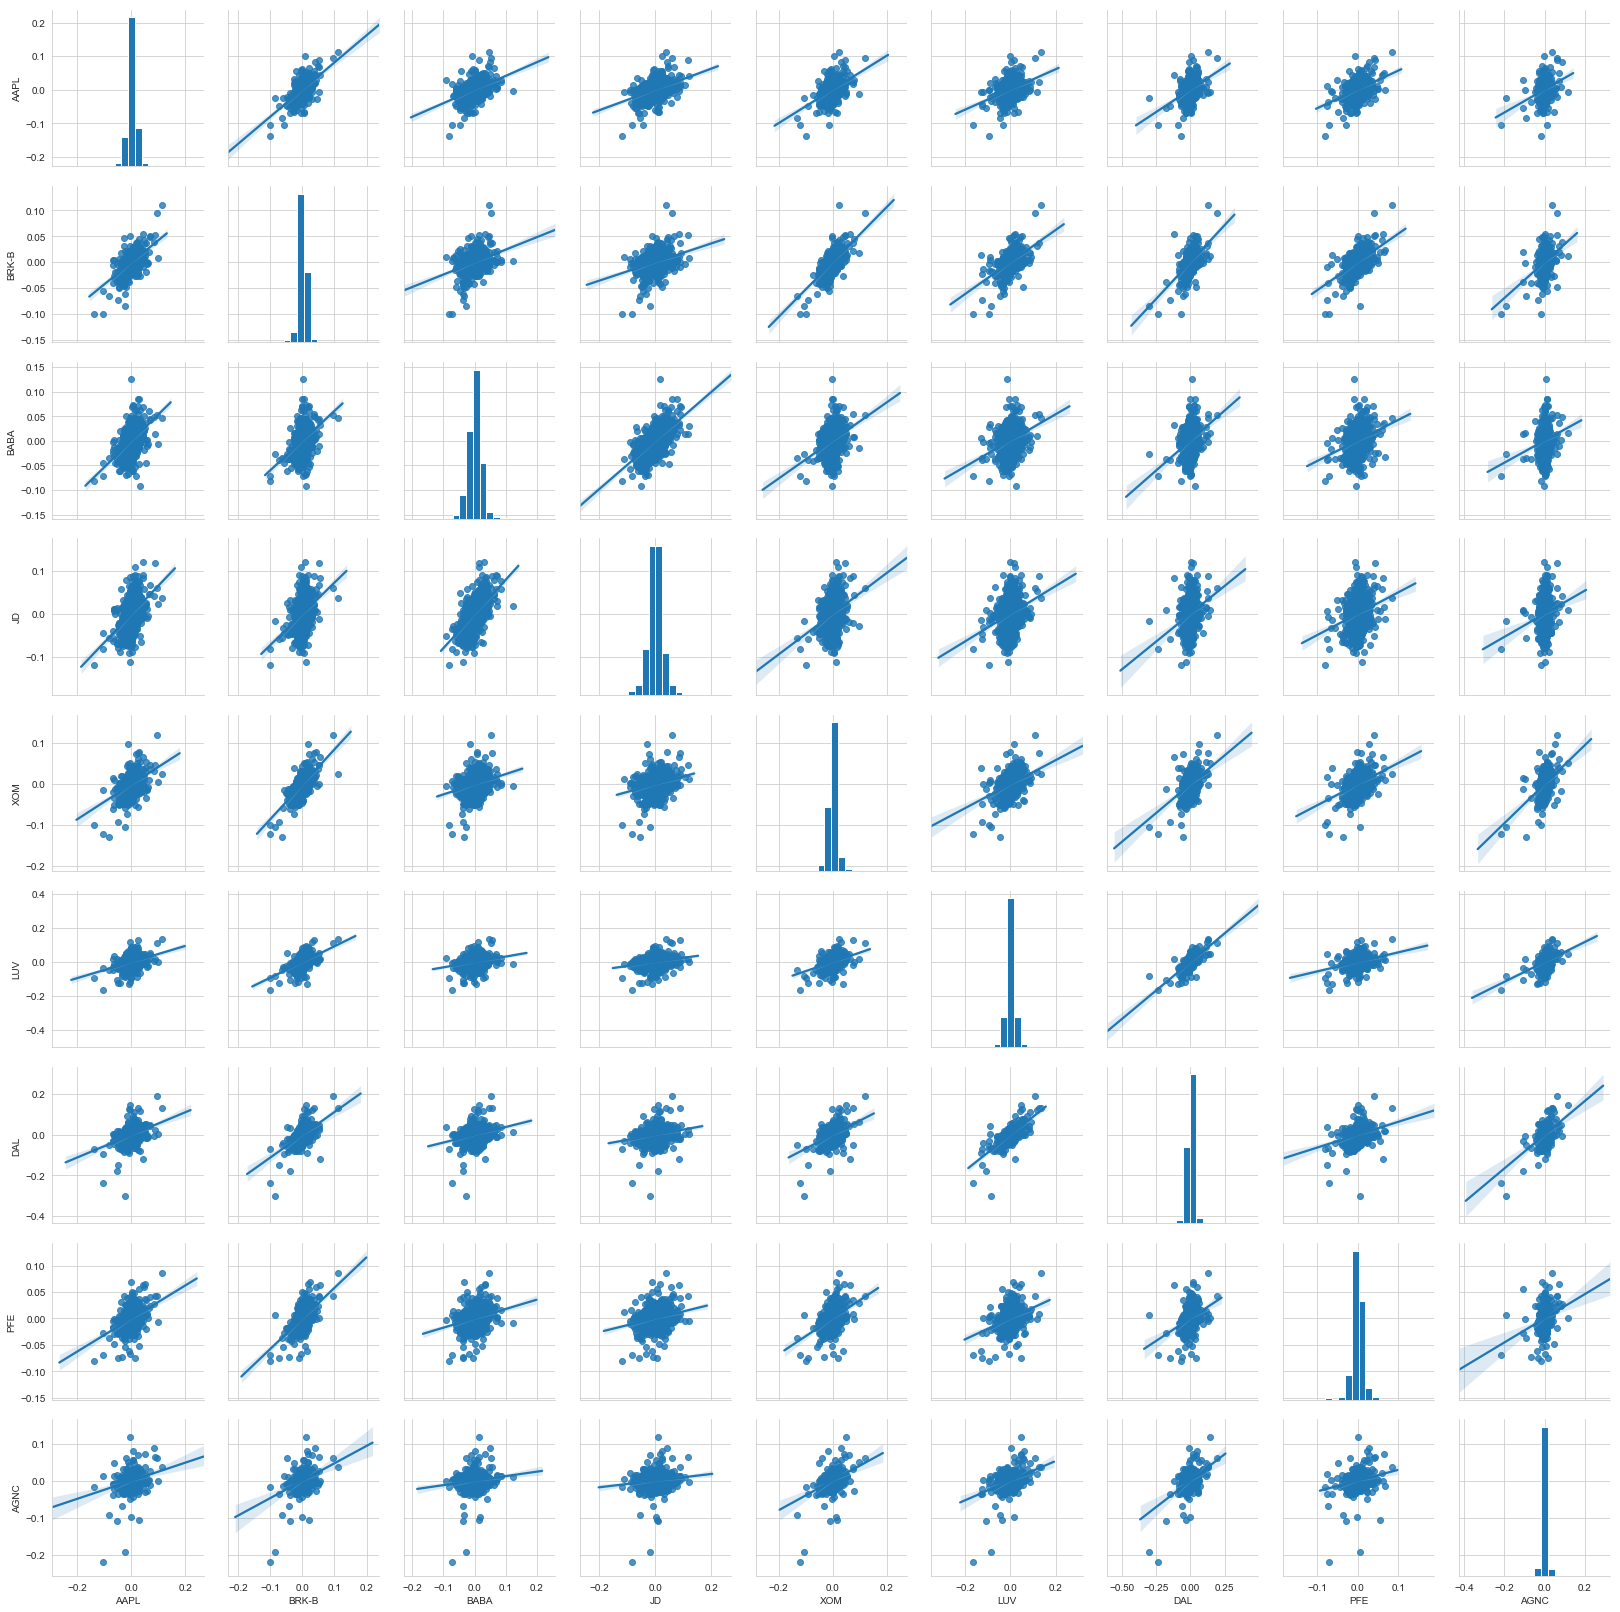

In [77]:
sns.set_style('whitegrid')
regression = sns.pairplot(returns[1:], kind="reg")
regression

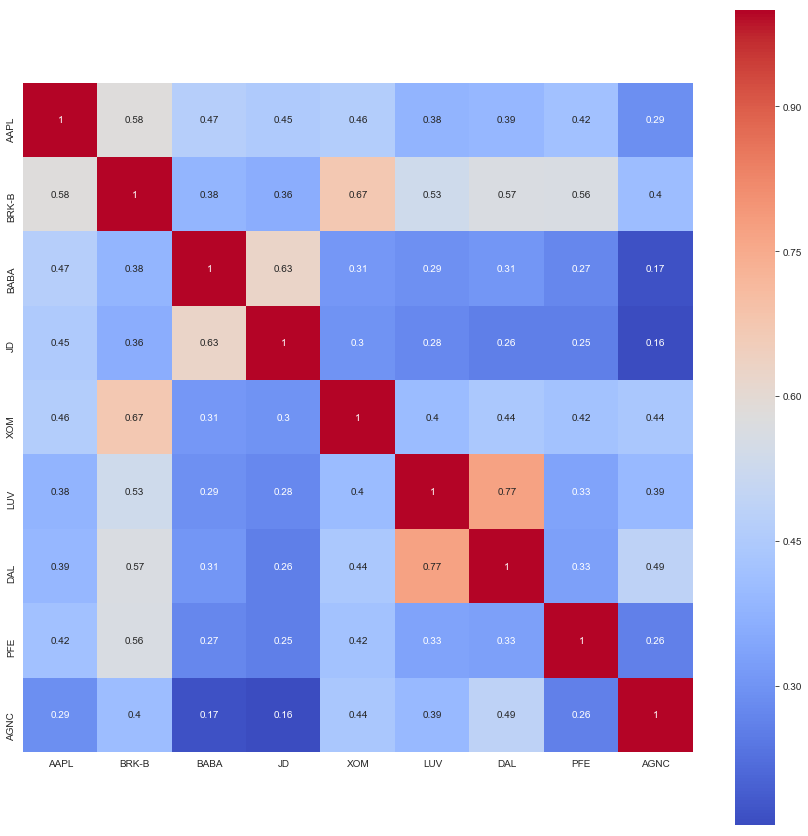

In [78]:
plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(return_corr, annot=True, square=True, cmap='coolwarm')
heatmap
